In [46]:
%matplotlib inline
from IPython.display import Image
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set the paths
datapth = os.path.join('..', 'test-swr', 'swr014')

In [47]:
nrch = 200
xlen = 25.
rlen = xlen / float(nrch)
print(rlen)

0.125


In [48]:
xcell = np.cumsum(np.ones(nrch, dtype=np.float) * rlen) - rlen / 2.
z = np.zeros(nrch,  dtype=np.float)
idx = ((xcell >= 8.) & (xcell <= 12.))
z[idx] = 0.2 - 0.05 * (xcell[idx] - 10.)**2.

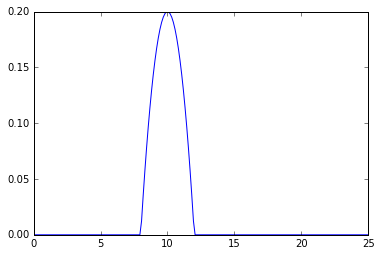

In [49]:
plt.plot(xcell, z)

In [50]:
f = open(os.path.join(datapth, 'swr_ds10.ref'), 'w')
for idx, zt in enumerate(z):
    f.write('{:10d}{:10d}{:15.7g}\n'.format(idx+1, 1, zt))
f.close()

In [53]:
sobj = flopy.utils.SwrStage(os.path.join(datapth, 'savant2011ex1.stg'))
s = sobj.get_data(idx=0)

sobj0 = flopy.utils.SwrStage(os.path.join(datapth, '.cmp', 'savant2011ex1.stg.cmp'))
s0 = sobj0.get_data(idx=0)

#### Plot the data from the binary SWR Process stage file

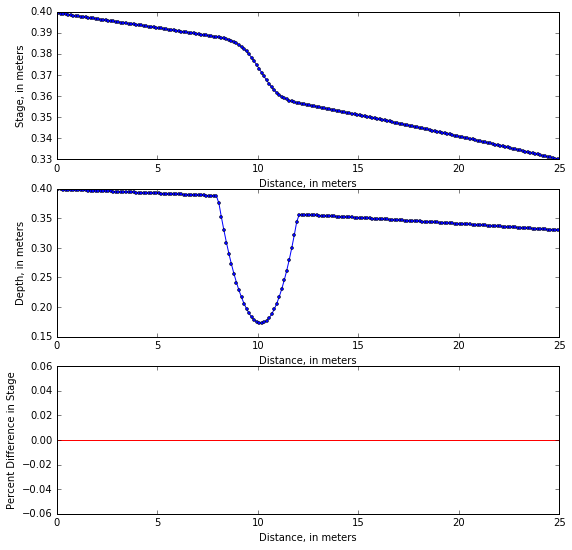

In [54]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(3, 1, 1)
ax.plot(xcell, s['stage'], color='blue')
ax.plot(xcell, s0['stage'], color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Stage, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 2)
ax.plot(xcell, s['stage']-z, color='blue')
ax.plot(xcell, s0['stage']-z, color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Depth, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 3)
ax.plot(xcell, 100.*(s['stage']-s0['stage'])/s0['stage'], color='red')
ax.set_ylabel('Percent Difference in Stage')
ax.set_xlabel('Distance, in meters')